In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('three_dataset.csv')
df.head()
print(df.isnull().sum())
print(df.columns.tolist())

num_people          0
house_size_m2       0
ac_usage_hours      0
electricity_bill    0
water_bill          0
dtype: int64
['num_people', 'house_size_m2', 'ac_usage_hours', 'electricity_bill', 'water_bill']


In [5]:
x = df[['num_people', 'house_size_m2', 'ac_usage_hours']].values.reshape(-1,3)
y = df[['electricity_bill', 'water_bill']].values.reshape(-1,2)

xs = MinMaxScaler()
ys = MinMaxScaler()

x = xs.fit_transform(x)
y = ys.fit_transform(y)

jb.dump(xs, 'three_x_scaler.pkl')
jb.dump(ys, 'three_y_scaler.pkl')

['three_y_scaler.pkl']

In [13]:
def Bills(num, size, hours):
    xs = jb.load("three_x_scaler.pkl")
    ys = jb.load("three_y_scaler.pkl")
    model_path = 'three.keras'
    inp = np.array([[num, size, hours]], dtype=float)
    inp = xs.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'), 
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(units=2)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        h = model.fit(x, y, epochs=200)
        model.save('three.keras')
        lv = h.history['loss']
        pred= model.predict(x)
        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        
        plt.subplot(1,2,1)
        plt.title('Electricity Bill')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.scatter(y[:,0], pred[:, 0], label = "actual vs predicted", color='blue')
        plt.plot([y[:, 0].min(), y[:, 0].max()], [y[:,0].min(), y[:, 0].max()], 'k--')
        plt.grid(True)
        plt.legend()


        plt.subplot(1,2,2)
        plt.title('water bill')
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.scatter(y[:,1], pred[:,1],label="actual vs predicted", color='green')
        plt.plot([y[:,1].min(), y[:,1].max()], [y[:,1].min(), y[:,1].max()], 'k--')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()
    return ys.inverse_transform(model.predict(inp))[0]

Epoch 1/200


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.5178
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4575
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3788
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3422
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3033
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2536 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2140
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1922 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1666 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1426
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1099
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0810
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0628
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0359 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0250
Epoch 16/200
4/4 ━━━━━━━━━━━━━━

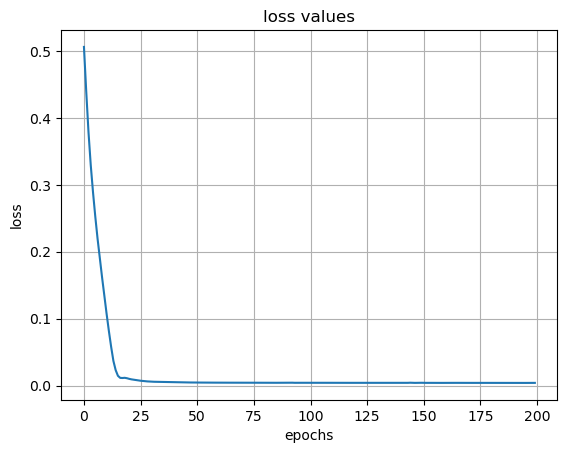

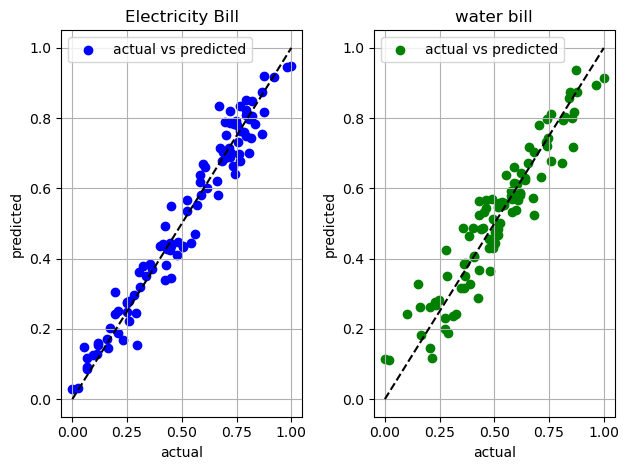

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Electricity Bill: ₹151.26, Predicted Water Bill: ₹42.60


In [14]:
result = Bills(4, 120.0, 6.5)
print(f"Predicted Electricity Bill: ₹{result[0]:.2f}, Predicted Water Bill: ₹{result[1]:.2f}")
